In [1]:
import cv2
import os

## Data Collection

In [2]:
Rock_data = []

In [3]:
cap = cv2.VideoCapture(0)

count = 1

while(True):
    
    ret, frame = cap.read()
    if ret == False:
        continue
    
    cv2.rectangle(frame,(50,100),(274,324),(255,0,0),2)
    cv2.rectangle(frame,(400,100),(624,324),(0,255,0),2)
    
    # Images for the model
    if count%5 == 0:
        f1 = frame[100:324, 400:624]
        f2 = frame[100:324, 50:274]
        Rock_data.append(f1)
        Rock_data.append(f2)
        
    count += 1
    
    frame = cv2.resize(frame, (1000, 700))
    frame = cv2.flip(frame,1)
    
    if count == 510:
        break
        
    cv2.imshow("Rock Paper Scissors", frame)
    
    key_pressed = cv2.waitKey(1) & 0xFF
    
    if key_pressed == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

In [4]:
import matplotlib.pyplot as plt
import numpy as np

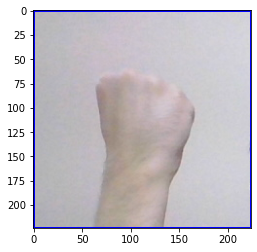

In [5]:
sample = cv2.cvtColor(Rock_data[-1], cv2.COLOR_BGR2RGB)
plt.imshow(sample)

In [6]:
Paper_data = []

In [7]:
cap = cv2.VideoCapture(0)

count = 1

while(True):
    
    ret, frame = cap.read()
    if ret == False:
        continue
    
    cv2.rectangle(frame,(50,100),(274,324),(255,0,0),2)
    cv2.rectangle(frame,(400,100),(624,324),(0,255,0),2)
    
    # Images for the model
    if count%5 == 0:
        f1 = frame[100:324, 400:624]
        f2 = frame[100:324, 50:274]
        Paper_data.append(f1)
        Paper_data.append(f2)
        
    count += 1
    
    frame = cv2.resize(frame, (1000, 700))
    frame = cv2.flip(frame,1)
    
    if count == 510:
        break
        
    cv2.imshow("Rock Paper Scissors", frame)
    
    key_pressed = cv2.waitKey(1) & 0xFF
    
    if key_pressed == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

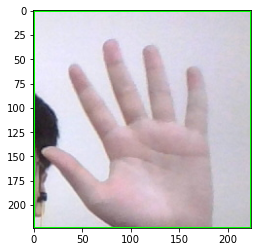

In [8]:
sample = cv2.cvtColor(Paper_data[44], cv2.COLOR_BGR2RGB)
plt.imshow(sample)

In [9]:
Sci_data = []

In [10]:
cap = cv2.VideoCapture(0)

count = 1

while(True):
    
    ret, frame = cap.read()
    if ret == False:
        continue
    
    cv2.rectangle(frame,(50,100),(274,324),(255,0,0),2)
    cv2.rectangle(frame,(400,100),(624,324),(0,255,0),2)
    
    # Images for the model
    if count%5 == 0:
        f1 = frame[100:324, 400:624]
        f2 = frame[100:324, 50:274]
        Sci_data.append(f1)
        Sci_data.append(f2)
        
    count += 1
    
    frame = cv2.resize(frame, (1000, 700))
    frame = cv2.flip(frame,1)
    
    if count == 510:
        break
        
    cv2.imshow("Rock Paper Scissors", frame)
    
    key_pressed = cv2.waitKey(1) & 0xFF
    
    if key_pressed == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

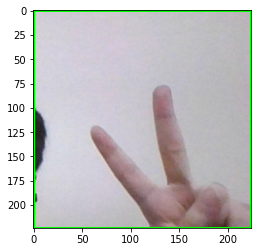

In [11]:
sample = cv2.cvtColor(Sci_data[30], cv2.COLOR_BGR2RGB)
plt.imshow(sample)

In [12]:
X_data = []
labels = []
for i in range(len(Rock_data)):
    X_data.append(Rock_data[i])
    labels.append("Rock")
    
for i in range(len(Paper_data)):
    X_data.append(Paper_data[i])
    labels.append("Paper")
    
for i in range(len(Sci_data)):
    X_data.append(Sci_data[i])
    labels.append("Scissor")

In [13]:
len(X_data), len(labels)

(606, 606)

In [14]:
# One hot encoded labels
from keras.utils import np_utils
labels_dict = {
    "Paper" : 0,
    "Rock" : 1,
    "Scissor" : 2
}
for idx,label in enumerate(labels):
    labels[idx] = labels_dict[label]
Y_train = np_utils.to_categorical(labels)
Y_train.shape
X_train = np.array(X_data)

In [24]:
X_train.shape, Y_train.shape

((606, 224, 224, 3), (606, 3))

## Storing the data for training

In [25]:
import pickle

with open("X.pkl", "wb") as f:
    pickle.dump(X_train, f)
    
with open("Y.pkl", "wb") as f:
    pickle.dump(Y_train, f)